Import the necessary packages

In [2]:
# Data Handling
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.metrics import mean_squared_log_error
from IPython.display import display
from statsmodels.tsa.api import ExponentialSmoothing


# Other Packages
import warnings

warnings.filterwarnings("ignore")



In [3]:
# Import dataset

train_df = pd.read_csv("data/store-sales-time-series-forecasting/train.csv")
test_df = pd.read_csv("data/store-sales-time-series-forecasting/test.csv")
stores_df = pd.read_csv("data//store-sales-time-series-forecasting/stores.csv")
oil_df = pd.read_csv("data/store-sales-time-series-forecasting/oil.csv")
holidays_events_df = pd.read_csv("data/store-sales-time-series-forecasting/holidays_events.csv")
transactions_df = pd.read_csv("data/store-sales-time-series-forecasting/transactions.csv")

Data Processing, Exploratory Data Analysis and Feature Engineering

In [4]:
# Print out the shapes of the train and test datasets
print(f"Train Dataset: {train_df.shape}")
print(f"Test Datasets: {test_df.shape}")

Train Dataset: (3000888, 6)
Test Datasets: (28512, 5)


In [5]:
# Print out the shapes of the other datasets
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {holidays_events_df.shape}")
print(f"Oil Dataset: {oil_df.shape}")
print(f"Stores Dataset: {stores_df.shape}")
print(f"Transactions Dataset: {transactions_df.shape}")

Shapes of Each Dataset:
Holiday Events Dataset: (350, 6)
Oil Dataset: (1218, 2)
Stores Dataset: (54, 5)
Transactions Dataset: (83488, 3)


In [6]:
# Get the column information of each dataset
# Function to display column information of the datasets
def show_column_info(dataset_name, dataset):
    print(f"Data types for the {dataset_name} dataset:")
    print(dataset.info())
    print('==='*14)

In [7]:
# Column information of the train and test columns
show_column_info('Train', train_df)
print()
show_column_info('Test', test_df)

Data types for the Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Data types for the Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None


In [8]:
# Column information of the other datasets
show_column_info('Holiday events', holidays_events_df)
print()
show_column_info('Oil', oil_df)
print()
show_column_info('Stores', stores_df)
print()
show_column_info('Transactions', transactions_df)

Data types for the Holiday events dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

Data types for the Oil dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

Data types for the Stores dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Dat

In [9]:
# Converting the 'date' column in the datasets to datetime format
# Train dataset
train_df['date'] = pd.to_datetime(train_df['date'])

# Test dataset
test_df['date'] = pd.to_datetime(test_df['date'])

# Holiday Events dataset
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

# Oil dataset
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Transactions dataset
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

In [10]:
# Confirm the data type of the 'date' column after transformation
print('Date Column Data Type After Transformation:') 
print('==='*14)
print("Train dataset:", train_df['date'].dtype)
print("Test dataset:", test_df['date'].dtype)
print("Holiday Events dataset:", holidays_events_df['date'].dtype)
print("Oil dataset:", oil_df['date'].dtype)
print("Transactions dataset:", transactions_df['date'].dtype)

Date Column Data Type After Transformation:
Train dataset: datetime64[ns]
Test dataset: datetime64[ns]
Holiday Events dataset: datetime64[ns]
Oil dataset: datetime64[ns]
Transactions dataset: datetime64[ns]


In [11]:
# Checking for the summary statistics of the datasets 
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_events_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df}

for name, data in datasets.items():
    print(f"{name.capitalize()} dataset summary statistics:")
    print('---'*15)
    print(data.describe())
    print('==='*20)
    print()

Train dataset summary statistics:
---------------------------------------------
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

Test dataset summary statistics:
---------------------------------------------
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.0

In [12]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_events_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df, }

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in the Test dataset:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing values in the Holiday events dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing values in the Oil dataset:
date           0
dcoilwtico    43
dtype: int64

Missing values in the Stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in the Transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64



In [13]:
# Visualizing the 'dcoilwtico' column to Identify a Strategy for Handling Missing Values
fig = px.line(oil_df, x='date', y='dcoilwtico')
fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [14]:
# Fill missing values in the 'dcoilwtico' column using backfill strategy
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='backfill')

In [15]:
# Check for missing values after handling
missing_values_after = oil_df['dcoilwtico'].isnull().sum()
missing_values_after

0

In [16]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_events_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df, }

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in the Test dataset:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing values in the Holiday events dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing values in the Oil dataset:
date          0
dcoilwtico    0
dtype: int64

Missing values in the Stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in the Transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64



In [17]:

# Visualizing the 'dcoilwtico' column to confirm proper handling of Missing Values
fig = px.line(oil_df, x='date', y='dcoilwtico')
fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [18]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [19]:
# Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

# Concatenate the original train dataset and the missing data DataFrame
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train_df = pd.concat([train_df, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train_df.sort_values('date', inplace=True)

In [20]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


In [21]:
train_df.shape

(3000892, 6)

In [22]:
# Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
# Merge train_df with stores_df based on 'store_nbr' column
merged_df = train_df.merge(stores_df, on='store_nbr', how='inner')

# Merge merged_df1 with transactions_df based on 'date' and 'store_nbr' columns
# merged_df2 = merged_df1.merge(transactions_df, on=['date', 'store_nbr'], how='inner')

# Merge merged_df2 with holidays_events_df based on 'date' column
merged_df = merged_df.merge(holidays_events_df, on='date', how='inner')

# Merge merged_df3 with oil_df based on 'date' column
# merged_df = merged_df3.merge(oil_df, on='date', how='inner')

# View the first five rows of the merged dataset
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,24.0,2013-01-01,1.0,MEATS,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,23.0,2013-01-01,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,22.0,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,21.0,2013-01-01,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [23]:
# # Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
# # Merge train_df with stores_df based on 'store_nbr' column
# merged_df1 = test_df.merge(stores_df, on='store_nbr', how='inner')

# # # Merge merged_df1 with transactions_df based on 'date' and 'store_nbr' columns
# # merged_df2 = merged_df1.merge(transactions_df, on=['date', 'store_nbr'], how='inner')

# # # Merge merged_df2 with holidays_events_df based on 'date' column
# merged_df3 = merged_df1.merge(holidays_events_df, on='date', how='inner')

# # # Merge merged_df3 with oil_df based on 'date' column
# test_df2 = merged_df3.merge(oil_df, on='date', how='inner')

# # # View the first five rows of the merged dataset
# test_df2.head()

In [24]:
# Check the unique values of the two unknown columns
print("Unique values of 'type_x':")
print(merged_df['type_x'].unique())
print()
print("Unique values of 'type_y':")
print(merged_df['type_y'].unique())

Unique values of 'type_x':
['D' 'E' 'C' 'A' 'B']

Unique values of 'type_y':
['Holiday' 'Work Day' 'Additional' 'Event' 'Transfer' 'Bridge']


In [25]:
# Renaming the columns with the approapriate names
merged_df = merged_df.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,24.0,2013-01-01,1.0,MEATS,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,23.0,2013-01-01,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,22.0,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,21.0,2013-01-01,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [26]:
# Generate summary statistics and transpose the rows and columns of the resultant DataFrame.
# Transposing flips the DataFrame (the rows become columns and the columns become rows) for better readability
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,502524.0,1.607496e+06,819472.781706,0.0,961611.0,1673297.5,2203442.25,3000887.0
store_nbr,502524.0,2.750000e+01,15.585800,1.0,14.0,27.5,41.00,54.0
sales,502524.0,3.938648e+02,1253.233869,0.0,0.0,12.0,214.00,124717.0
onpromotion,502524.0,3.141870e+00,14.154672,0.0,0.0,0.0,0.00,720.0
cluster,502524.0,8.481481e+00,4.649739,1.0,4.0,8.5,13.00,17.0


In [27]:
# Check for missing values in the merged datasets
missing_values = merged_df.isnull().sum()
missing_values

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [28]:
# Check for duplicate values in the merged dataset
duplicate_rows_merged = merged_df.duplicated()
duplicate_rows_merged.sum()

0

In [29]:
# Check for duplicate values in the test dataset
duplicate_rows_test = test_df.duplicated()
duplicate_rows_test.sum()

0

In [30]:
merged_df.to_csv('Visualization_Data.csv', index=False)
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,24.0,2013-01-01,1.0,MEATS,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,23.0,2013-01-01,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,22.0,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,21.0,2013-01-01,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [31]:
# Create A Copy of The Merged Dataset
merged_df_copy = merged_df.copy()
merged_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502524 entries, 0 to 502523
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            502524 non-null  float64       
 1   date          502524 non-null  datetime64[ns]
 2   store_nbr     502524 non-null  float64       
 3   family        502524 non-null  object        
 4   sales         502524 non-null  float64       
 5   onpromotion   502524 non-null  float64       
 6   city          502524 non-null  object        
 7   state         502524 non-null  object        
 8   store_type    502524 non-null  object        
 9   cluster       502524 non-null  int64         
 10  holiday_type  502524 non-null  object        
 11  locale        502524 non-null  object        
 12  locale_name   502524 non-null  object        
 13  description   502524 non-null  object        
 14  transferred   502524 non-null  bool          
dtypes: bool(1), datet

Univariate, Multivariate and Bivariate Analysis

Univariate Analysis

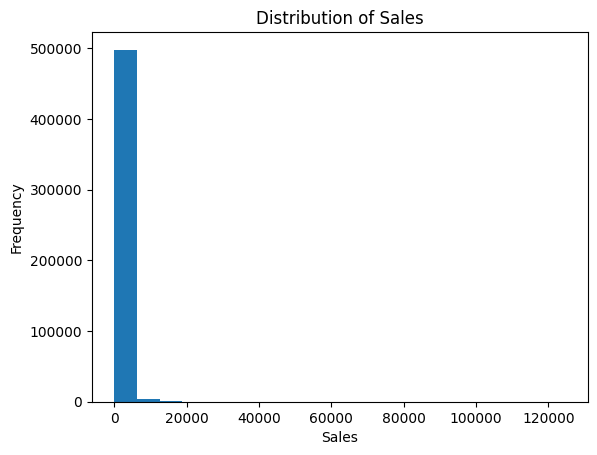

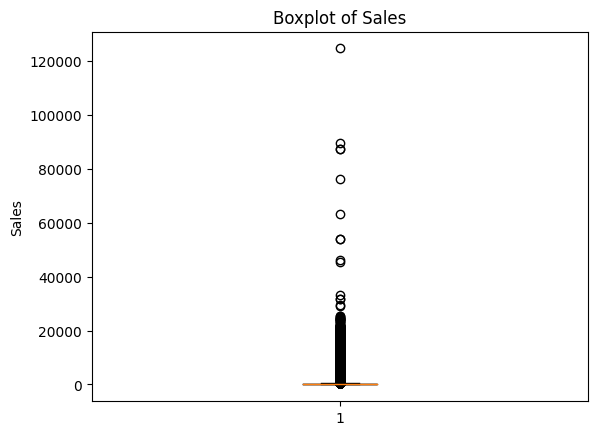

In [32]:
# Histogram
plt.hist(merged_df['sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# Boxplot
plt.boxplot(merged_df['sales'])
plt.ylabel('Sales')
plt.title('Boxplot of Sales')
plt.show()

In [33]:
# # Histogram
# plt.hist(merged_df['transactions'], bins=20)
# plt.xlabel('Transactions')
# plt.ylabel('Frequency')
# plt.title('Distribution of Transactions')
# plt.show()

# # Boxplot
# plt.boxplot(merged_df['transactions'])
# plt.ylabel('Transactions')
# plt.title('Boxplot of Transactions')
# plt.show()

In [34]:
# # Histogram
# plt.hist(merged_df['dcoilwtico'], bins=20)
# plt.xlabel('Oil Price')
# plt.ylabel('Frequency')
# plt.title('Distribution of Oil Price')
# plt.show()

# # Boxplot
# plt.boxplot(merged_df['dcoilwtico'])
# plt.ylabel('Oil Price')
# plt.title('Boxplot of Oil Price')
# plt.show()

In [35]:
# Group the data by date and calculate the total sales
daily_sales = merged_df.groupby('date')['sales'].sum().reset_index()

# Create a time series plot with slider
fig = px.line(daily_sales, x='date', y='sales')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title='Trend of Sales Over Time', title_x=0.5)
fig.show()

In [36]:
# # Visualizing the 'dcoilwtico' column to confirm if the trend is consistent.
# fig = px.line(oil_df, x='date', y='dcoilwtico')
# fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
# fig.show()

Bivariate Analysis

In [37]:
# Set the color palette to "viridis"
sns.set_palette("viridis")

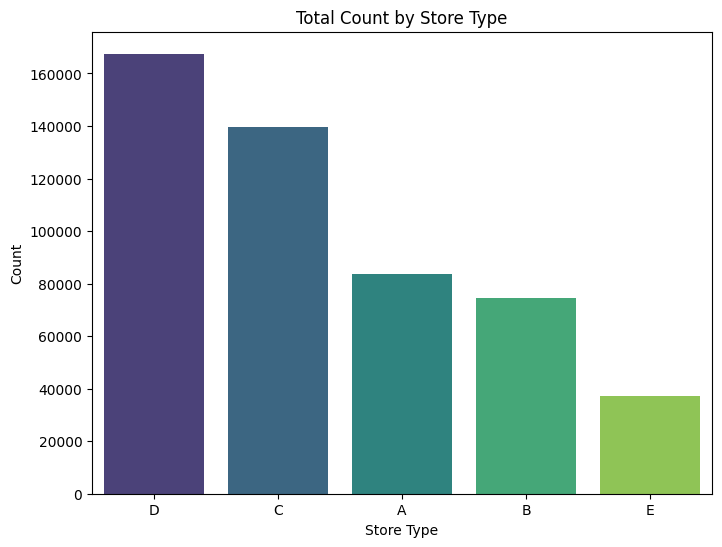

In [38]:
# Calculate the total count and total sales per store type
store_type_counts = merged_df['store_type'].value_counts()
store_type_sales = merged_df.groupby('store_type')['sales'].sum()

# Create a bar plot with "viridis" color palette for total count
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_counts.index, y=store_type_counts.values, palette = 'viridis')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Total Count by Store Type')
plt.show()

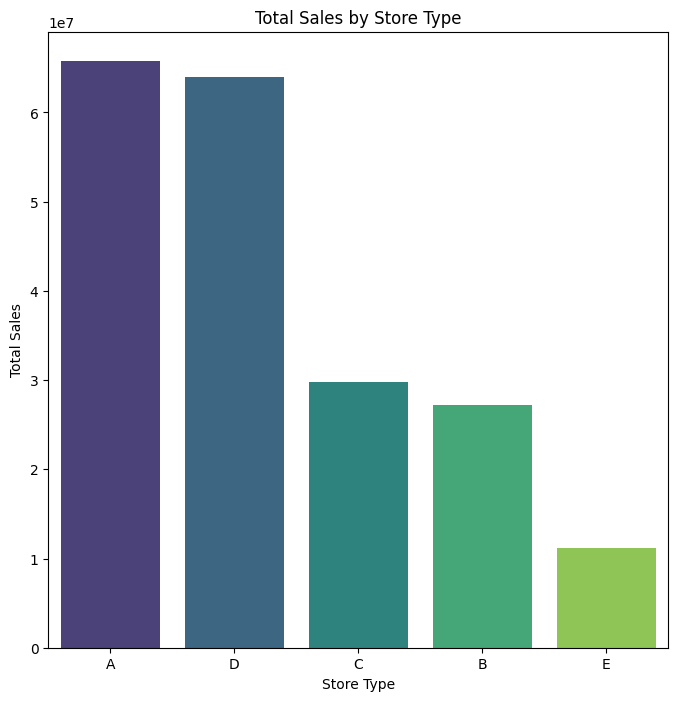

In [39]:
# Order the store types by total sales
store_type_sales = store_type_sales.sort_values(ascending=False)

# Create a bar plot with "viridis" color palette for total sales
plt.figure(figsize=(8, 8))
sns.barplot(x=store_type_sales.index, y=store_type_sales.values, order=store_type_sales.index, palette="viridis")
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Type')
plt.show()

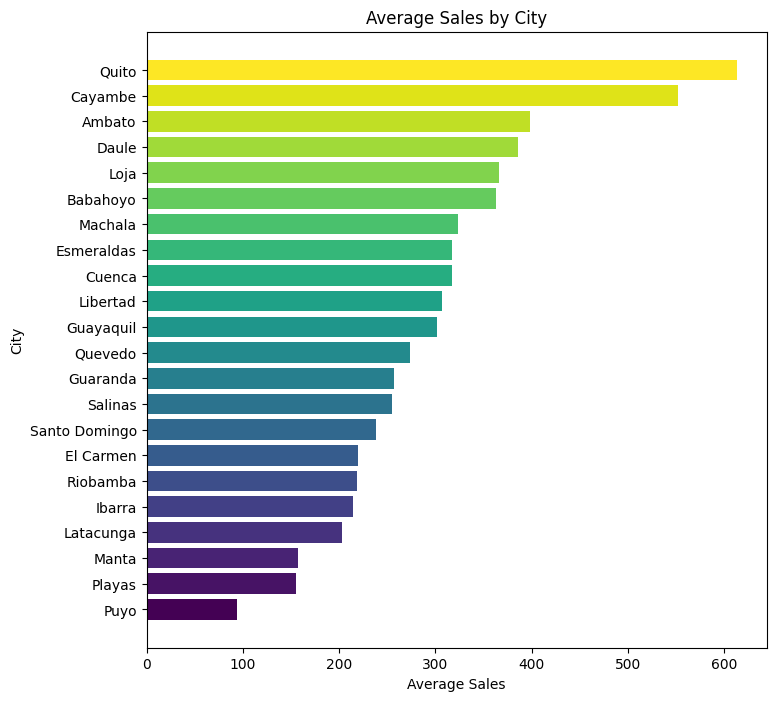

In [40]:

# Group by city and calculate the average sales
average_sales_by_city = merged_df.groupby('city')['sales'].mean()

# Sort the data by average sales in ascending order
average_sales_by_city = average_sales_by_city.sort_values(ascending=True)

# Define colors for the bar plot using 'viridis' color palette
colors = cm.viridis(np.linspace(0, 1, len(average_sales_by_city)))

# Plot the average sales by city horizontally
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_city.index, average_sales_by_city.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.title('Average Sales by City')
plt.show()

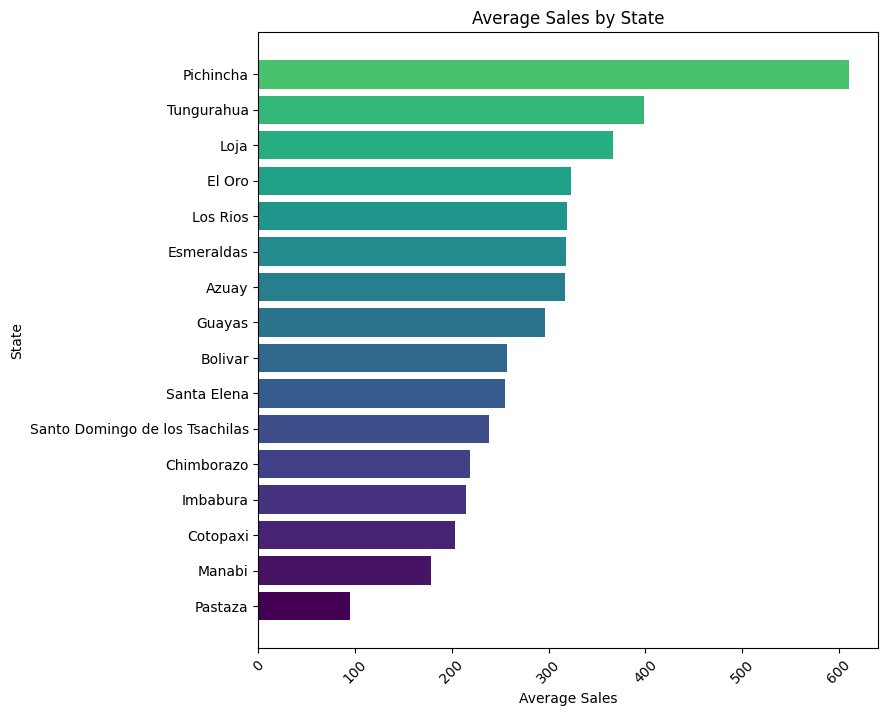

In [41]:
# Group by state and calculate the average sales
average_sales_by_state = merged_df.groupby('state')['sales'].mean()

# Sort the data by average sales in descending order
average_sales_by_state = average_sales_by_state.sort_values(ascending=True)

# Plot the average sales by state
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_state.index, average_sales_by_state.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.title('Average Sales by State')
plt.xticks(rotation=45)
plt.show()

In [42]:

# sns.scatterplot(x='transactions', y='sales', data=merged_df)
# plt.xlabel('Transactions')
# plt.ylabel('Sales')
# plt.title('Relationship between Sales and Transactions')
# plt.show()

Multivariate Analysis

In [43]:
# # Select numerical variables for correlation analysis
# numerical_vars = ['sales', 'transactions', 'dcoilwtico']

# # Compute correlation matrix
# corr_matrix = merged_df[numerical_vars].corr()

# # Plot heatmap
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [44]:
# # Select numerical variables for correlation analysis
# numerical_vars = ['sales', 'transactions', 'dcoilwtico']

# # Plot scatter plot matrix
# sns.pairplot(merged_df[numerical_vars])
# plt.show()

Stationarity test

In [ ]:
# Statistical Test of the 'sales' column in the merged_df using Adfuller
sales_data = merged_df['sales']

# Perform ADF test
result = adfuller(sales_data)

# Extract the test statistics and p-value from the result
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the test statistics and critical values
print(f"ADF Test Statistics: {test_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value <= 0.05:
    print("Reject the null hypothesis: The sales data is stationary.")
else:
    print("Fail to reject the null hypothesis: The sales data is non-stationary.")

In [45]:
# Extract the relevant variables for the hypothesis test
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)


from scipy.stats import ttest_ind

# Extract the relevant variables for the hypothesis test
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)

# Print the test result
print("Hypothesis Testing for Promotional Activities:")
print("Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.")
print("Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.")
print("-" * 50)
print("Test Statistic:", t_statistic)
print("P-value:", p_value)
print("=" * 50)
if p_value < 0.05:
    print("Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.")
else:
    print("Fail to reject the null hypothesis. Promotional activities do not have a significant impact on store sales at Corporation Favorita.")

Hypothesis Testing for Promotional Activities:
Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.
Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.
--------------------------------------------------
Test Statistic: 92.81868548573304
P-value: 0.0
Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.


In [46]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


In [47]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year

lowest_sales_dates = merged_df.groupby('year')['date'].min()
highest_sales_dates = merged_df.groupby('year')['date'].max()

print("Dates with the lowest sales for each year:\n", lowest_sales_dates)
print("="*50)
print("Dates with the highest sales for each year:\n", highest_sales_dates)

Dates with the lowest sales for each year:
 year
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-01-01
2017   2017-01-01
Name: date, dtype: datetime64[ns]
Dates with the highest sales for each year:
 year
2013   2013-12-31
2014   2014-12-31
2015   2015-12-31
2016   2016-12-31
2017   2017-08-15
Name: date, dtype: datetime64[ns]


In [150]:
# test_df2['date'] = pd.to_datetime(test_df2['date'])
# test_df2['year'] = test_df2['date'].dt.year

# test_df2.head()

In [151]:
# # Assign the variable earthquake_date to the date the earthquake took place (April 16, 2016)
# earthquake_date = pd.to_datetime('2016-04-16')

# # Filter the sales data before and after the earthquake
# sales_before_earthquake = train_df[train_df['date'] < earthquake_date]['sales']
# sales_after_earthquake = train_df[train_df['date'] > earthquake_date]['sales']

# # Set the colormap to viridis
# colormap = cm.get_cmap('viridis')

# # Plot the sales before and after the earthquake
# plt.plot(sales_before_earthquake, color=colormap(0.2), label='Sales Before Earthquake')
# plt.plot(sales_after_earthquake, color=colormap(0.8), label='Sales After Earthquake')
# plt.xlabel('Time')
# plt.ylabel('Sales')
# plt.legend()
# plt.show()


In [48]:
merged_df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,year
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.000,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013
1,24.0,2013-01-01,1.0,MEATS,0.000,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013
2,23.0,2013-01-01,1.0,MAGAZINES,0.000,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013
3,22.0,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.000,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013
4,21.0,2013-01-01,1.0,LINGERIE,0.000,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502519,2999697.0,2017-08-15,25.0,PRODUCE,1269.174,2.0,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017
502520,2999696.0,2017-08-15,25.0,PREPARED FOODS,25.468,0.0,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017
502521,2999695.0,2017-08-15,25.0,POULTRY,172.517,0.0,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017
502522,2999694.0,2017-08-15,25.0,PLAYERS AND ELECTRONICS,3.000,0.0,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017


In [49]:
# Group by cluster and calculate the average sales
average_sales_by_cluster = merged_df.groupby('cluster')['sales'].mean()

# Group by city and calculate the average sales
average_sales_by_city = merged_df.groupby('city')['sales'].mean()

# Group by state and calculate the average sales
average_sales_by_state = merged_df.groupby('state')['sales'].mean()

# Group by store type and calculate the average sales
average_sales_by_store_type = merged_df.groupby('store_type')['sales'].mean()

# Set the number of bars in each plot
num_bars = len(average_sales_by_cluster)

# Generate the colors using the viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

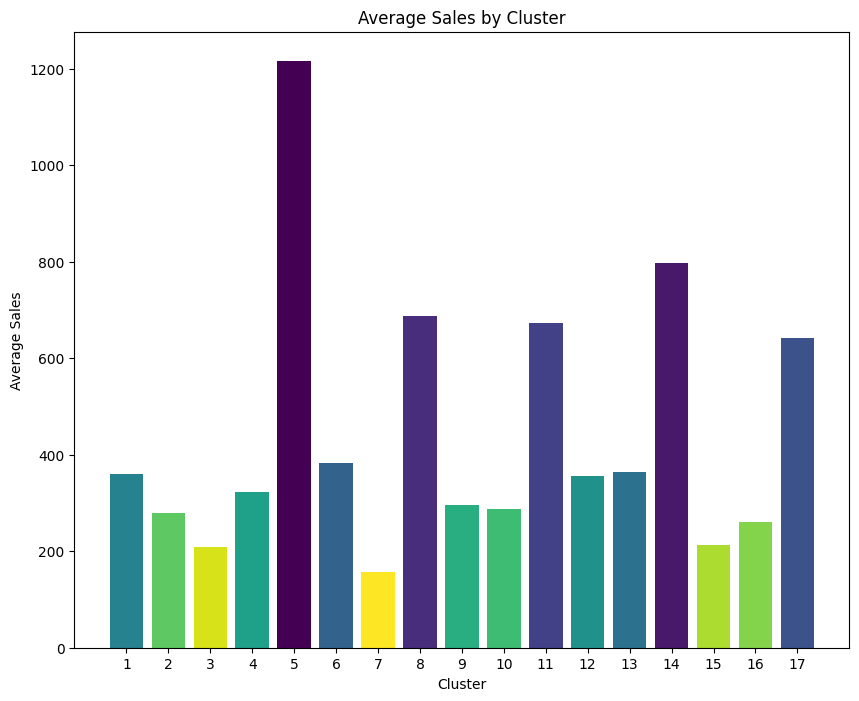

In [50]:
# Sort the data by average sales in descending order
average_sales_by_cluster = average_sales_by_cluster.sort_values(ascending=False)

# Plot the average sales by cluster
plt.figure(figsize=(10, 8))
plt.bar(average_sales_by_cluster.index, average_sales_by_cluster.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Average Sales')
plt.title('Average Sales by Cluster')

# Set the x-tick labels as integers
plt.xticks(range(1, len(average_sales_by_cluster.index) + 1))
plt.show()

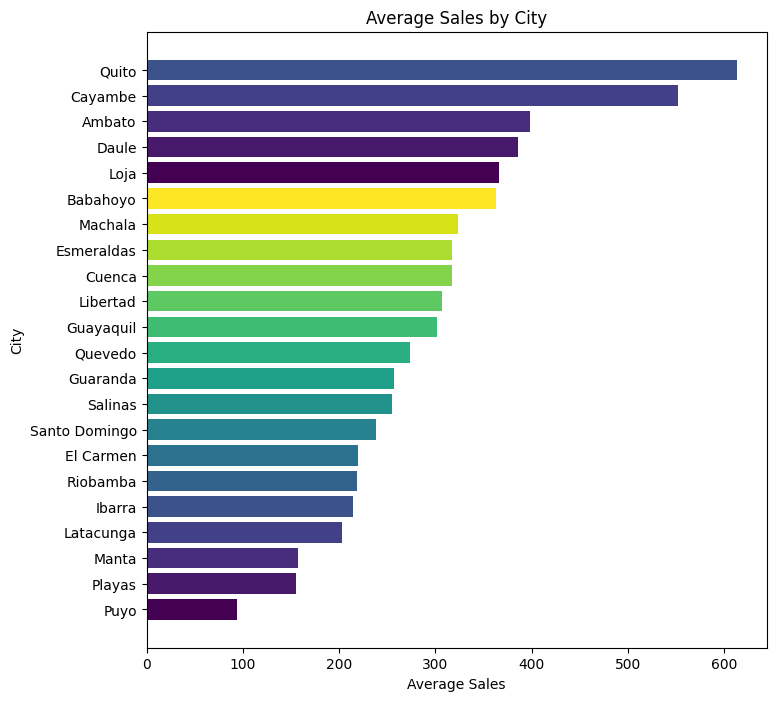

In [51]:
# Sort the data by average sales in descending order
average_sales_by_city = average_sales_by_city.sort_values(ascending=True)

# Plot the average sales by city horizontally
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_city.index, average_sales_by_city.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.title('Average Sales by City')
plt.show()

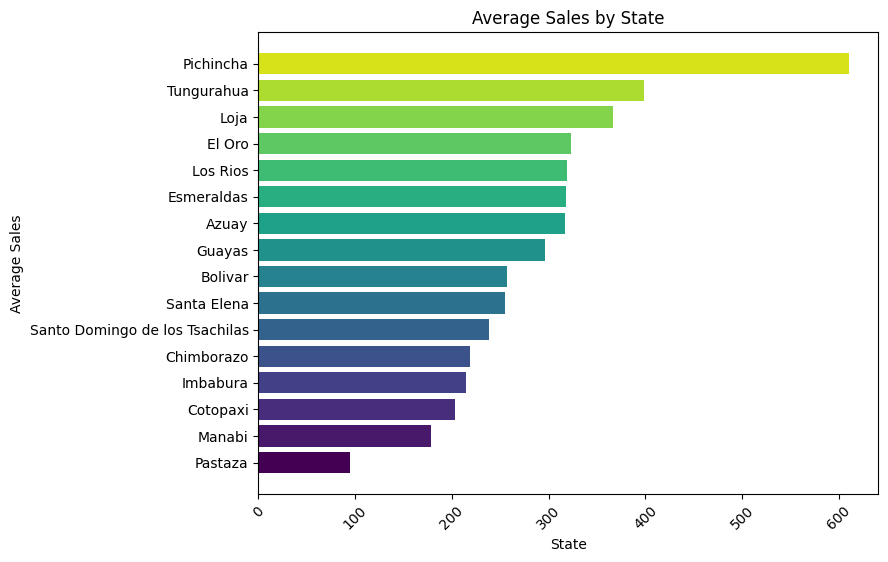

In [52]:
# Sort the data by average sales in descending order
average_sales_by_state = average_sales_by_state.sort_values(ascending=True)

# Plot the average sales by state
plt.figure(figsize=(8, 6))
plt.barh(average_sales_by_state.index, average_sales_by_state.values, color=colors)
plt.xlabel('State')
plt.ylabel('Average Sales')
plt.title('Average Sales by State')
plt.xticks(rotation=45)
plt.show()

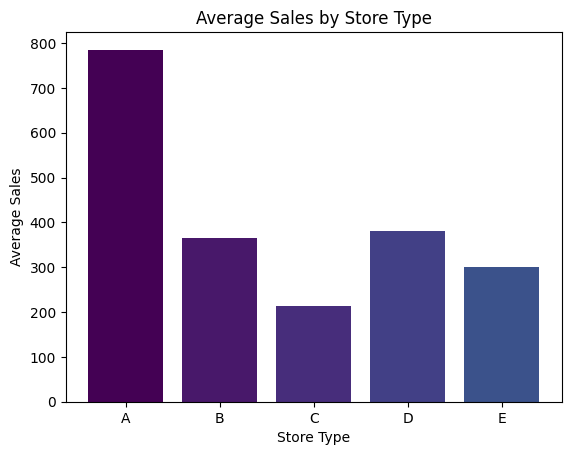

In [53]:
# Plot the average sales by store type
plt.bar(average_sales_by_store_type.index, average_sales_by_store_type.values, color=colors)
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store Type')
plt.show()

In [54]:
# Calculate correlations between sales and promotions, oil prices, holidays
corr_sales_promotions = merged_df['sales'].corr(merged_df['onpromotion'])
# corr_sales_oil = merged_df['sales'].corr(merged_df['dcoilwtico'])
corr_sales_holidays = merged_df['sales'].corr(merged_df['holiday_type'] == 'Holiday')

# Print the correlation values
print(f"Correlation between Sales and Promotions: {corr_sales_promotions}")
# print(f"Correlation between Sales and Oil Prices: {corr_sales_oil}")
print(f"Correlation between Sales and Holidays: {corr_sales_holidays}")

Correlation between Sales and Promotions: 0.41719716448980404
Correlation between Sales and Holidays: -0.03509034769678589


In [55]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,year,month,day
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1
1,24.0,2013-01-01,1.0,MEATS,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1
2,23.0,2013-01-01,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1
3,22.0,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1
4,21.0,2013-01-01,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1


In [160]:
# test_df2['month'] = test_df2['date'].dt.month
# test_df2['day'] = test_df2['date'].dt.day

# test_df2.head()

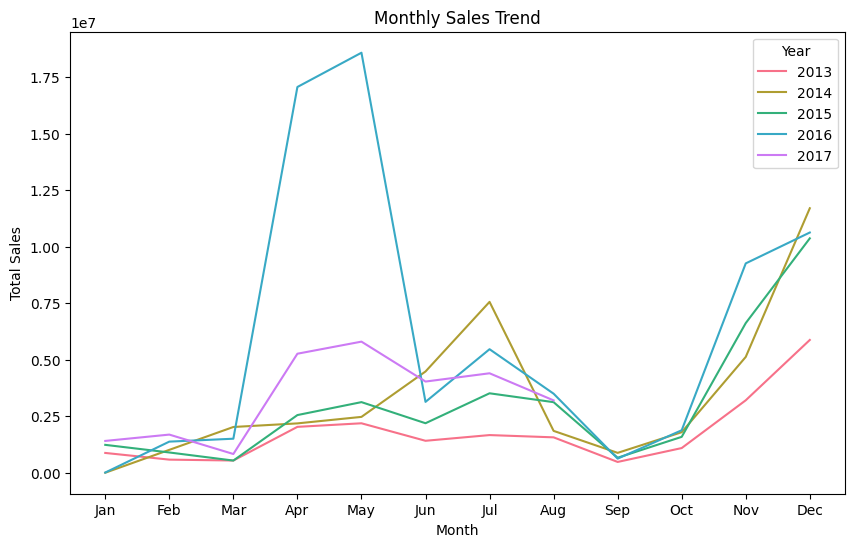

In [56]:
# Set distinct colors for each year
colors = sns.color_palette("husl", n_colors=len(merged_df_copy['year'].unique()))

# Visualize the Monthly Sales Trend
monthly_sales = merged_df_copy.groupby(['year', 'month'])['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', palette=colors)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

In [162]:
# test_df2['day_of_week'] = test_df2['date'].dt.dayofweek

In [57]:
# Visualize the Day of the Week Sales Pattern
merged_df_copy['day_of_week'] = merged_df_copy['date'].dt.dayofweek
# day_of_week_sales = merged_df_copy.groupby('day_of_week')['sales'].mean().reset_index()
# plt.figure(figsize=(8, 6))
# sns.barplot(data=day_of_week_sales, x='day_of_week', y='sales', palette='viridis')
# plt.title('Average Sales by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Average Sales')
# plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
# plt.show()

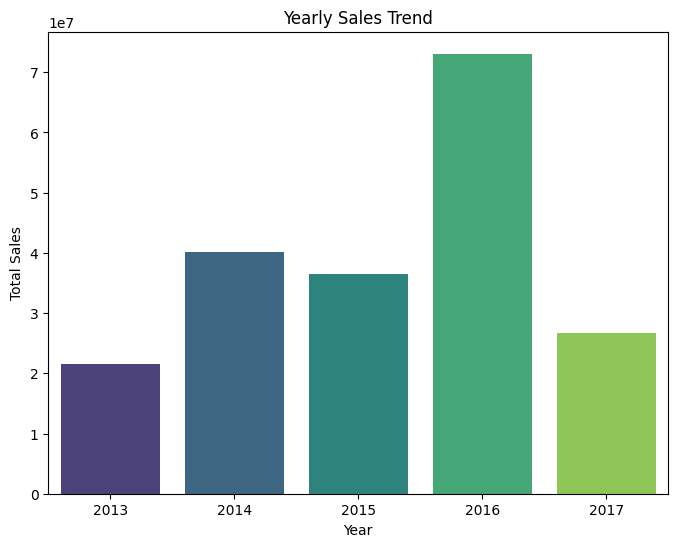

In [58]:
# Visualize the Yearly Sales Trend
yearly_sales = merged_df_copy.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='year', y='sales', palette='viridis')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

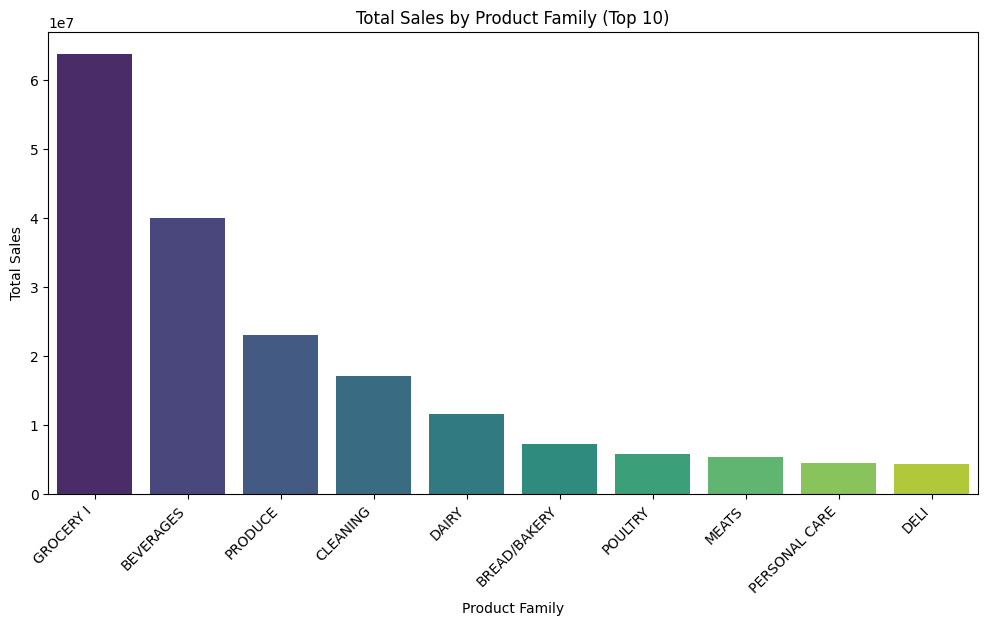

In [59]:
# Group the data by product family and calculate the total sales
family_sales = merged_df.groupby('family')['sales'].sum().sort_values(ascending=False)

# Select the top 10 product families
top_10_families = family_sales.head(10)

# Plot the relationship between product family and sales for the top 10 families
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_families.index, y=top_10_families.values, palette='viridis')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Family (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

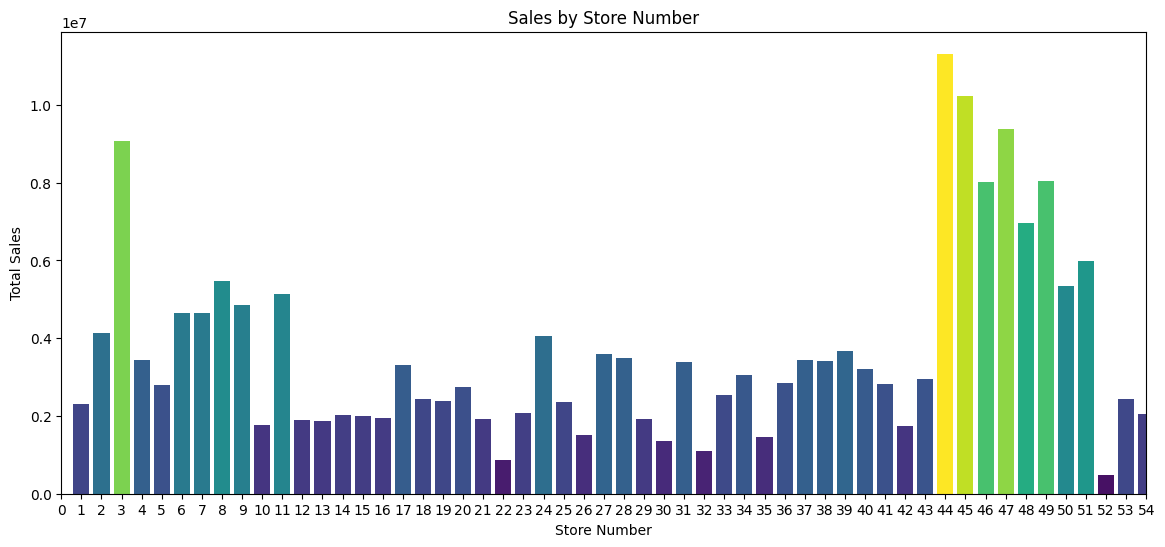

In [60]:
store_sales = merged_df.groupby('store_nbr')['sales'].sum()

plt.figure(figsize=(14, 6))
plt.bar(store_sales.index, store_sales.values, color=cm.viridis(store_sales.values/max(store_sales.values)))
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Sales by Store Number')

# Set the X-axis limits and ticks
plt.xlim(0, 54)
plt.xticks(range(55))

plt.show()

Feature Engineering

In [61]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,year,month,day,day_of_week
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
1,24.0,2013-01-01,1.0,MEATS,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
2,23.0,2013-01-01,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
3,22.0,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
4,21.0,2013-01-01,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1


In [62]:
columns_to_drop = ['date','id', 'locale', 'locale_name', 'description', 'store_type', 'transferred', 'state']
merged_df_copy = merged_df_copy.drop(columns=columns_to_drop)

merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,holiday_type,year,month,day,day_of_week
0,1.0,AUTOMOTIVE,0.0,0.0,Quito,13,Holiday,2013,1,1,1
1,1.0,MEATS,0.0,0.0,Quito,13,Holiday,2013,1,1,1
2,1.0,MAGAZINES,0.0,0.0,Quito,13,Holiday,2013,1,1,1
3,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,13,Holiday,2013,1,1,1
4,1.0,LINGERIE,0.0,0.0,Quito,13,Holiday,2013,1,1,1


In [63]:
unique_families = merged_df_copy['family'].unique()
unique_families

array(['AUTOMOTIVE', 'MEATS', 'MAGAZINES', 'LIQUOR,WINE,BEER', 'LINGERIE',
       'LAWN AND GARDEN', 'LADIESWEAR', 'HOME CARE', 'HOME APPLIANCES',
       'HOME AND KITCHEN II', 'HOME AND KITCHEN I', 'HARDWARE',
       'PERSONAL CARE', 'GROCERY II', 'FROZEN FOODS', 'EGGS', 'DELI',
       'DAIRY', 'CLEANING', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS',
       'BEVERAGES', 'BEAUTY', 'GROCERY I', 'PET SUPPLIES', 'POULTRY',
       'PLAYERS AND ELECTRONICS', 'SEAFOOD', 'SCHOOL AND OFFICE SUPPLIES',
       'PRODUCE', 'PREPARED FOODS', 'BABY CARE'], dtype=object)

In [65]:
# Define the category lists for each product category
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']

# Categorize the 'family' column based on the product categories
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(food_families), 'FOODS', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(home_families), 'HOME', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(clothing_families), 'CLOTHING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(grocery_families), 'GROCERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(stationery_families), 'STATIONERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(cleaning_families), 'CLEANING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(hardware_families), 'HARDWARE', merged_df_copy['family'])

# Print the updated DataFrame
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,holiday_type,year,month,day,day_of_week
0,1.0,AUTOMOTIVE,0.0,0.0,Quito,13,Holiday,2013,1,1,1
1,1.0,FOODS,0.0,0.0,Quito,13,Holiday,2013,1,1,1
2,1.0,STATIONERY,0.0,0.0,Quito,13,Holiday,2013,1,1,1
3,1.0,"LIQUOR,WINE,BEER",0.0,0.0,Quito,13,Holiday,2013,1,1,1
4,1.0,CLOTHING,0.0,0.0,Quito,13,Holiday,2013,1,1,1


Feature Scaling

In [66]:
# Scaling Numeric Variables (Min-Max Scaling)
# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
# num_cols = ['sales', 'transactions', 'dcoilwtico']
num_cols = ['sales']

# fit and transform the numerical columns
merged_df_copy[num_cols] = scaler.fit_transform(merged_df_copy[num_cols])

# Display the updated dataframe
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,holiday_type,year,month,day,day_of_week
0,1.0,AUTOMOTIVE,-0.314279,0.0,Quito,13,Holiday,2013,1,1,1
1,1.0,FOODS,-0.314279,0.0,Quito,13,Holiday,2013,1,1,1
2,1.0,STATIONERY,-0.314279,0.0,Quito,13,Holiday,2013,1,1,1
3,1.0,"LIQUOR,WINE,BEER",-0.314279,0.0,Quito,13,Holiday,2013,1,1,1
4,1.0,CLOTHING,-0.314279,0.0,Quito,13,Holiday,2013,1,1,1


In [67]:
# Define the categorical columns to encode
categorical_columns = ["family", "city", "holiday_type"]

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(merged_df_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
merged_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
merged_df_encoded = pd.concat([merged_df_copy, merged_df_encoded], axis=1)

# Drop the original categorical columns
merged_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
merged_df_encoded.head()

,store_nbr,sales,onpromotion,cluster,year,month,day,day_of_week,family_AUTOMOTIVE,family_BEAUTY,...,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer,holiday_type_Work Day
0,1.0,-0.314279,0.0,13,2013,1,1,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,-0.314279,0.0,13,2013,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,-0.314279,0.0,13,2013,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,-0.314279,0.0,13,2013,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,-0.314279,0.0,13,2013,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
# Product Categorization Based on Families
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI', 'PRODUCE', 'DAIRY', 'POULTRY', 'EGGS', 'SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES', 'SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE', 'PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS', 'HARDWARE']

test_df['family'] = np.where(test_df['family'].isin(food_families), 'FOODS', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(home_families), 'HOME', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(clothing_families), 'CLOTHING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(grocery_families), 'GROCERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(stationery_families), 'STATIONERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(cleaning_families), 'CLEANING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(hardware_families), 'HARDWARE', test_df['family'])

In [69]:
# Encoding The Categorical Variables
# List of categorical columns to encode
categorical_columns = ["family"]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the 'test_df' data for the specified categorical columns
one_hot_encoded_data = encoder.fit_transform(test_df[categorical_columns])

# Get the column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the one-hot encoded data and corresponding column names
test_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original 'test_df' with the one-hot encoded data
test_df_encoded = pd.concat([test_df, test_df_encoded], axis=1)

# Drop the original categorical columns since they have been encoded
test_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the updated 'test_df_encoded' DataFrame
test_df_encoded.head()

,id,date,store_nbr,onpromotion,family_AUTOMOTIVE,family_BEAUTY,family_CELEBRATION,family_CLEANING,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_LADIESWEAR,family_LAWN AND GARDEN,"family_LIQUOR,WINE,BEER",family_PET SUPPLIES,family_STATIONERY
0,3000888,2017-08-16,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000889,2017-08-16,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000890,2017-08-16,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3000891,2017-08-16,1,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000892,2017-08-16,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Modelling

In [182]:
## Dropping transactions since it's not in test data
# merged_df_encoded = merged_df_encoded.drop(columns=["transactions"])

In [70]:
train_set = merged_df_encoded.loc[merged_df_encoded['year'].isin([2013, 2014, 2015, 2016])]
eval_set = merged_df_encoded.loc[merged_df_encoded['year'] == 2017]

In [184]:
train_set.shape

(449064, 50)

In [72]:
eval_set.head()

,store_nbr,sales,onpromotion,cluster,year,month,day,day_of_week,family_AUTOMOTIVE,family_BEAUTY,...,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer,holiday_type_Work Day
449064,1.0,-0.314279,0.0,13,2017,1,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449065,1.0,-0.314279,0.0,13,2017,1,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449066,1.0,-0.314279,0.0,13,2017,1,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449067,1.0,-0.314279,0.0,13,2017,1,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449068,1.0,-0.314279,0.0,13,2017,1,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [186]:
eval_set.shape

(53460, 50)

In [187]:
eval_set.head()

,store_nbr,sales,onpromotion,cluster,year,month,day,day_of_week,family_AUTOMOTIVE,family_BEAUTY,...,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer,holiday_type_Work Day
449064,42.0,-0.314279,0.0,2,2017,1,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449065,42.0,-0.314279,0.0,2,2017,1,1,6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449066,42.0,-0.314279,0.0,2,2017,1,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449067,42.0,-0.314279,0.0,2,2017,1,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
449068,42.0,-0.314279,0.0,2,2017,1,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [188]:
# Separate the target variable and features for training and testing
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales'] 


X_eval = eval_set.drop('sales', axis=1)  
y_eval = eval_set['sales']

In [189]:
# Initialize the results dataframe
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

Model 1 Linear Regression

In [190]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_eval)

# Calculate metrics
lr_mse = mean_squared_error(y_eval, lr_predictions)
lr_mae = mean_absolute_error(y_eval, lr_predictions)

# Apply the absolute value function to both y_eval and lr_predictions
y_eval_abs = abs(y_eval)
lr_predictions_abs = abs(lr_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
lr_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, lr_predictions_abs))

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({'Model': ['Linear Regression'],
                            'RMSLE': [lr_rmsle],
                            'RMSE': [np.sqrt(lr_mse)],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

# Print the results_lr dataframe
results_lr

,Model,RMSLE,RMSE,MSE,MAE
0,Linear Regression,0.28,0.92,0.84,0.4


Model 2. Random Forest Regression

In [191]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_eval)

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)

# Apply the absolute value function to both y_eval and rf_predictions
y_eval_abs = abs(y_eval)
rf_predictions_abs = abs(rf_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'RMSLE': [rf_rmsle],
                            'RMSE': [np.sqrt(rf_mse)],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)

# Print the results_rf dataframe
results_rf

,Model,RMSLE,RMSE,MSE,MAE
0,Random Forest,0.24,0.77,0.6,0.27


Model 3. Gradient Boosting Regression

In [192]:
# Gradient Boosting Regression Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_eval)

# Calculate metrics
gb_mse = mean_squared_error(y_eval, gb_predictions)
gb_mae = mean_absolute_error(y_eval, gb_predictions)

# Apply the absolute value function to both y_eval and gb_predictions
y_eval_abs = abs(y_eval)
gb_predictions_abs = abs(gb_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
gb_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, gb_predictions_abs))

# Create a DataFrame to store results for Gradient Boosting
results_gb = pd.DataFrame({'Model': ['Gradient Boosting'],
                            'RMSLE': [gb_rmsle],
                            'RMSE': [np.sqrt(gb_mse)],
                            'MSE': [gb_mse],
                            'MAE': [gb_mae]}).round(2)

# Print the results_gb dataframe
results_gb

,Model,RMSLE,RMSE,MSE,MAE
0,Gradient Boosting,0.24,0.75,0.56,0.32


Model 4. ARIMA

In [193]:
# ARIMA Model
# d and q are equal to zero as data is already stationary
p = 1
d = 0 
q = 0  

# Create an instance of the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))

# Fit the model to the training data
arima_model_fit = arima_model.fit()

# Make predictions on the evaluation data
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

# Calculate evaluation metrics
arima_mse = mean_squared_error(y_eval, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

# Apply the absolute value function to y_eval to remove negative signs
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)

# Calculate the Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(y_eval, arima_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

# Create a DataFrame to store results for ARIMA
results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSLE': [arima_rmsle],
                            'RMSE': [np.sqrt(arima_mse)],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

# Print the results_arima dataframe
results_arima

,Model,RMSLE,RMSE,MSE,MAE
0,ARIMA,0.46,1.16,1.35,0.5


Model 5. SARIMA

In [194]:
# Set the order and seasonal order parameters
# Seasonal autoregressive order
P = 0  
# Seasonal differencing order
D = 0  
# Seasonal moving average order
Q = 0  
# Number of time steps in each season (chosen based on the number of months each year)
s = 12  

# Create an instance of the SARIMA model
sarima_model = SARIMAX(endog=y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the model to the training data
sarima_fit = sarima_model.fit()

# Make predictions on the evaluation data
sarima_predictions = sarima_fit.forecast(steps=len(y_eval), exog=X_eval)

# Calculate metrics
sarima_mse = mean_squared_error(y_eval, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(y_eval, sarima_predictions)
sarima_rmsle = np.sqrt(mean_squared_error(np.log1p(y_eval), np.log1p(sarima_predictions)))

# Create a DataFrame to store results for SARIMA
results_sarima = pd.DataFrame({'Model': ['SARIMA'],
                                'RMSLE': [sarima_rmsle],
                                'RMSE': [sarima_rmse],
                                'MSE': [sarima_mse],
                                'MAE': [sarima_mae]}).round(2)

# Print the results_sarima dataframe
results_sarima

,Model,RMSLE,RMSE,MSE,MAE
0,SARIMA,0.39,0.92,0.84,0.4


Model 6 - Exponential Smoothing

In [ ]:
sales_base = train_df.groupby(['date', 'store_nbr', 'family'])['sales'].sum().reset_index()
sales_base.set_index('date', inplace=True)
# Create a pivot table to make each store and family pair a column
sales_base.reset_index(inplace=True)
sales_pivot = sales_base.pivot(index='date', columns=['store_nbr','family'], values='sales')
# Create a new index to have all the days in the period
new_index = pd.date_range(sales_pivot.index.min(), sales_pivot.index.max())
sales = sales_pivot.reindex(new_index, fill_value=0)

###########################
# Display the new dataframe
###########################
display(sales.head())

def compute_preds(store=1, family='AUTOMOTIVE'):
    time = sales['2017-06-01':'2017-08-15'].index
    train = sales.loc['2017-06-01':'2017-07-31'][(store, family)]
    val = sales.loc['2017-08-01':'2017-08-15'][(store, family)]

    # Calculate the predictions
    baseline = ExponentialSmoothing(train, trend=None, seasonal="additive", seasonal_periods=7).fit(optimized=True)
    preds = baseline.forecast(len(val))
    preds = preds.apply(lambda x: max(x, 0)) # just in case as we can not have negative sales 

    # Calculate the mean of the Time Series
    avg = np.full(len(val),train.mean())
    
    # Evaluate the model performance 
    rmsle_preds = mean_squared_log_error(val, preds, squared=False)
    rmsle_avg = mean_squared_log_error(val, avg, squared=False)
    
    return time, train, val, preds, avg, rmsle_preds, rmsle_avg

def plot_preds(time, train, val, preds, avg):
    plt.plot(time[:-15], train, 'o-', label="train")
    plt.plot(time[-15:], val, 'o-', color='orange', label="val")
    plt.plot(time[-15:], preds, 'o-', color='red', label="predictions")
    plt.plot(time[-15:], avg, 'o-', color='green', label="mean")
    plt.legend(loc='upper left')
    plt.title("Baseline with Triple Exponential Smoothing vs Mean")
    plt.grid(alpha=0.3)
    plt.show()

time, train, val, preds, avg, _, _ = compute_preds(store=1, family='CLEANING')
plot_preds(time, train, val, preds, avg)

sales_val = sales.loc['2017-08-01':'2017-08-15'].copy()
sales_avg = sales_val.copy()
sales_preds = sales_val.copy()

for s in range(1, 55):
    for f in train_df['family'].unique():
        _, _, _, preds, avg, _, _ = compute_preds(store=s, family=f)
        sales_avg[(s,f)]=avg
        sales_preds[(s,f)]=preds


# Calculate the performance of this triple exponential smoothing vs mean:

sales_val_u = sales_val.unstack()
sales_avg_u = sales_avg.unstack()
sales_preds_u = sales_preds.unstack()
rmsle_preds = mean_squared_log_error(sales_val_u.values, sales_preds_u.values, squared=False)
rmsle_avg = mean_squared_log_error(sales_val_u.values, sales_avg_u.values, squared=False)
print(f'rmsle_preds={rmsle_preds}')
print(f'rmsle_avg={rmsle_avg}')

Final Result Dataframe with validation metrics

In [195]:
# Append all results to the results dataframe
results_df = pd.concat([results_df, results_lr])
results_df = pd.concat([results_df, results_gb])
results_df = pd.concat([results_df, results_arima])
results_df = pd.concat([results_df, results_sarima])

# Sort the results_df based on RMSE in ascending order
results_df = results_df.sort_values(by='RMSLE', ascending=True)

# Reset the index of the DataFrame
results_df = results_df.reset_index(drop=True)

# Print the Final Results dataframe
results_df

,Model,RMSLE,RMSE,MSE,MAE
0,Gradient Boosting,0.24,0.75,0.56,0.32
1,Linear Regression,0.28,0.92,0.84,0.40
2,SARIMA,0.39,0.92,0.84,0.40
3,ARIMA,0.46,1.16,1.35,0.50


In [196]:
# Define the parameter grid for tuning the random forest model
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf,
                                      n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                      n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_eval)

# Calculate metrics for the best model
best_rf_mse = mean_squared_error(y_eval, best_rf_predictions)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_mae = mean_absolute_error(y_eval, best_rf_predictions)

# Apply absolute value to both predicted and target values
abs_best_rf_predictions = np.abs(best_rf_predictions)
abs_y_eval = np.abs(y_eval)

# Calculate RMSLE using the absolute values
best_rf_rmsle = np.sqrt(mean_squared_log_error(abs_y_eval, abs_best_rf_predictions))

# Create a DataFrame to store results for the best Random Forest model
best_results_rf = pd.DataFrame({'Model': ['Best Random Forest'],
                                'RMSLE': [best_rf_rmsle],
                                'RMSE': [best_rf_rmse],
                                'MSE': [best_rf_mse],
                                'MAE': [best_rf_mae]}).round(2)

# Print the best_results_rf dataframe
best_results_rf


,Model,RMSLE,RMSE,MSE,MAE
0,Best Random Forest,0.22,0.68,0.47,0.26


In [197]:
# Define the key components
key_components = {
    'model': best_rf_model, 
    'best_params': best_rf_params,
    'best_score': best_rf_rmsle
}

# Save the key components in a file using pickle
with open('best_rf_model_components_trans_removed.pkl', 'wb') as file:
    pickle.dump(key_components, file)

In [100]:
# with open('best_rf_model_components_trans_removed.pkl', 'rb') as file:
#     best_rf_model = pickle.load(file)

In [198]:
best_rf_model

RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=400, random_state=42)

In [199]:
test_encoded_final = pd.read_csv("test_modified.csv")

In [200]:
results = best_rf_model.predict(test_encoded_final)

In [201]:
test_df = pd.read_csv("data/store-sales-time-series-forecasting/test.csv")

# Extract 'id' column from the original DataFrame
id_column = test_df['id']

# Merge 'id' column with the new numpy array
new_column = pd.Series(results, name='sales')
results_df = pd.concat([id_column, new_column], axis=1)


In [202]:
results_df

,id,sales
0,3000888,-0.309874
1,3000889,-0.289211
2,3000890,-0.282319
3,3000891,0.868236
4,3000892,-0.311677
...,...,...
28507,3029395,0.142891
28508,3029396,-0.105547
28509,3029397,0.142891
28510,3029398,-0.127294


In [203]:
# num_cols = ['sales', 'transactions', 'dcoilwtico']
num_cols = ['sales']

# fit and transform the numerical columns
results_df[num_cols] = scaler.inverse_transform(results_df[num_cols])

In [204]:
results_df

,id,sales
0,3000888,5.521105
1,3000889,31.415533
2,3000890,40.053949
3,3000891,1481.966498
4,3000892,3.261082
...,...,...
28507,3029395,572.941031
28508,3029396,261.590416
28509,3029397,572.941031
28510,3029398,234.335945


In [206]:
results_df.to_csv("./submission/submission.csv", index=False)